In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Dataset Loading
import pandas as pd
import numpy as np

data=pd.read_csv("/content/drive/MyDrive/Synthetic_Financial_datasets_log.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (if any)
data = data.dropna()

# Check the class distribution
print(data['isFraud'].value_counts())

# Balance the dataset using undersampling or oversampling (if needed)
from imblearn.under_sampling import RandomUnderSampler

X = data.drop('isFraud', axis=1)
y = data['isFraud']

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print(y_res.value_counts())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    8213
1    8213
Name: count, dtype: int64


In [ ]:
# Convert categorical feature 'type' into numerical values
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Create new features based on existing ones
data['transactionDifferenceOrig'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['transactionDifferenceDest'] = data['oldbalanceDest'] - data['newbalanceDest']

# Drop irrelevant features
data = data.drop(['nameOrig', 'nameDest'], axis=1)

print(data.head())



   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
0             0.0        0               0          False       False   
1             0.0        0               0          False       False   
2             0.0        1               0          False       False   
3             0.0        1               0           True       False   
4             0.0        0               0          False       False   

   type_PAYMENT  type_TRANSFER  transactionDifferenceOrig  \
0          True          False                    9839.64   
1          True          False

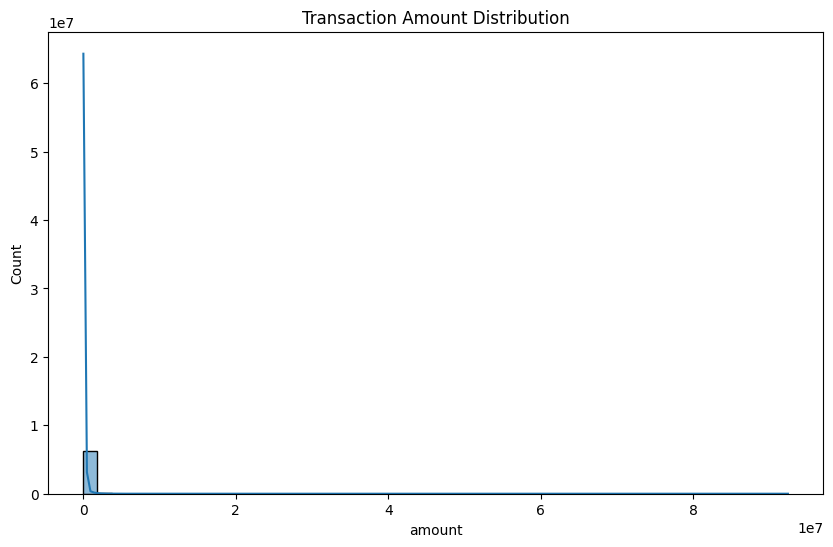

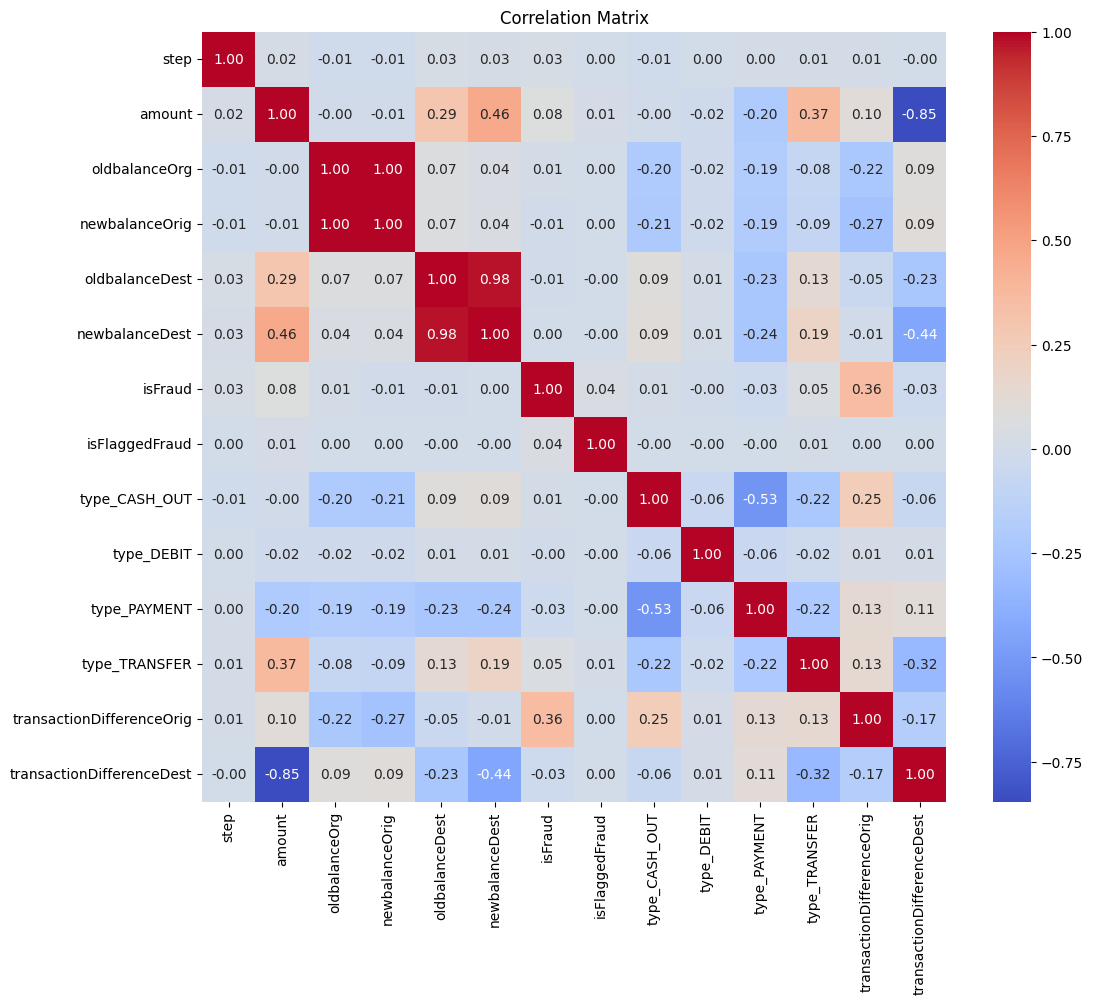

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'amount' feature
plt.figure(figsize=(10,6))
sns.histplot(data['amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Plot the correlation matrix
plt.figure(figsize=(12,10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

print("XGBoost model trained.")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:32:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost model trained.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


Accuracy: 0.9998
Precision: 0.9540
Recall: 0.8568
F1-Score: 0.9028
